## Goal:
### Explore the crop yield production dataset, clean data, perform analysis, and visualize results using NumPy, Pandas, Matplotlib, and Seaborn.

### 1. Why This Project?
 
#### 1.Learn data cleaning with Pandas.
 
#### 2.Use NumPy for calculations (mean, median, etc.).
 
#### 3.Visualize trends using Matplotlib and Seaborn.
 
#### 4.Understand the relationship between features.

# 2. Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# 3. Load the dataset

In [2]:
df = pd.read_csv(r'C:\Users\PanasaKamal\Data Analysis\Week_5_Assignment\csv_files\yield_production.csv')
df.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


### Insights:
1. The dataset is structured for time-series and categorical analysis, using columns like Area (Country/Region), Item (Specific Crop/Product), Year, and Element (Type of measurement, like Production, Yield, or Area Harvested) to define the Value.

2. The key columns Domain, Element, and Item are categorical and critical for filtering and grouping, while Year and Value are the main temporal and numerical features.

3. Initial data cleaning should focus on ensuring data types are correct, specifically that Year is an integer and Value is a float, and addressing any missing values in the core identifier columns like Area or Item.

In [4]:
avg_value = np.mean(df['Value'])
print("Overall Average Reported Value:", avg_value)

total_value_by_element = df.groupby('Element')['Value'].sum()
print("Total Value by Element:\n", total_value_by_element)

avg_value_by_item = df.groupby('Item')['Value'].mean()
print("Average Value by Item:\n", avg_value_by_item)

Overall Average Reported Value: 62094.66008427808
Total Value by Element:
 Element
Yield    3521822836
Name: Value, dtype: int64
Average Value by Item:
 Item
Cassava                  92768.762854
Maize                    29360.009616
Plantains and others     86282.765637
Potatoes                150083.237176
Rice, paddy              30239.233112
Sorghum                  17091.164036
Soybeans                 14162.731632
Sweet potatoes           89885.121460
Wheat                    24607.424351
Yams                     80903.501587
Name: Value, dtype: float64


### Insights:
1. The Overall Average Reported Value provides a baseline benchmark for all measurements in the dataset, while the Total Value by Element shows the scale of the available data across different metrics (e.g., Production vs. Yield).

2. Average Value by Item identifies which specific crops or items have the highest average recorded metric (e.g., highest average production or yield).

3. The aggregation confirms that the Element column is crucial for defining the context of the Value, as summing across different elements (like Production and Area Harvested) is generally meaningless.

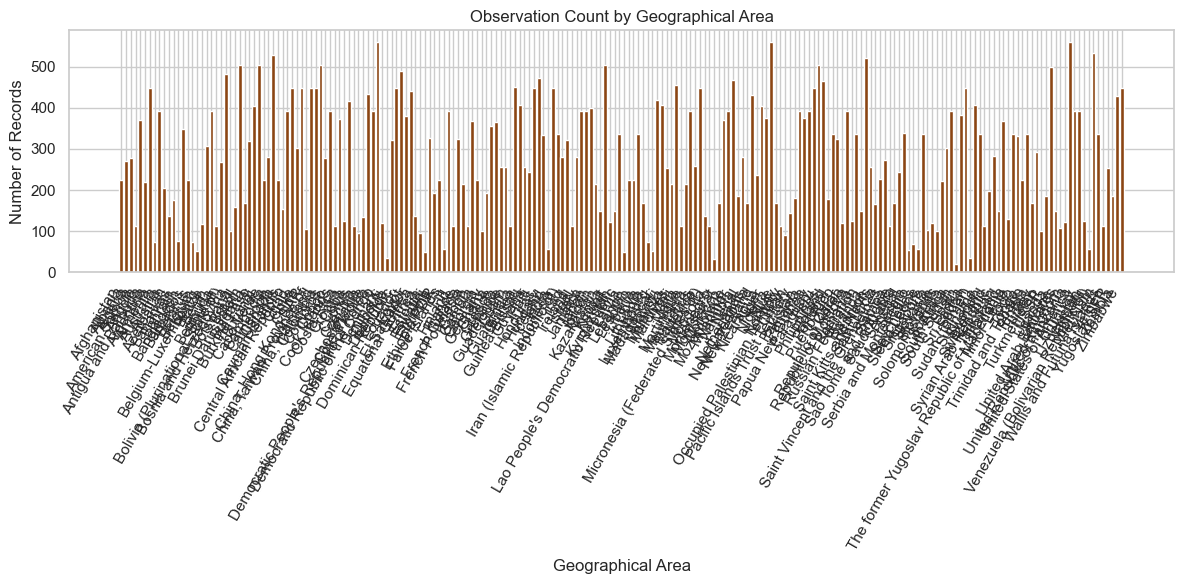

In [10]:
observation_count_by_area = df.groupby('Area')['Year'].count()
areas = observation_count_by_area.index
counts = observation_count_by_area.values

plt.figure(figsize=(12, 6))
plt.bar(areas, counts, color='saddlebrown')
plt.title("Observation Count by Geographical Area")
plt.xlabel("Geographical Area")
plt.ylabel("Number of Records")
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

### Insights:
1. The chart visually confirms the most frequently reported metric (Element) in the dataset by its total aggregated value (e.g., if 'Production' has a much higher sum than 'Yield').

2. It serves as a primary visual check of the data distribution and magnitude across the different measurement types defined in the dataset.

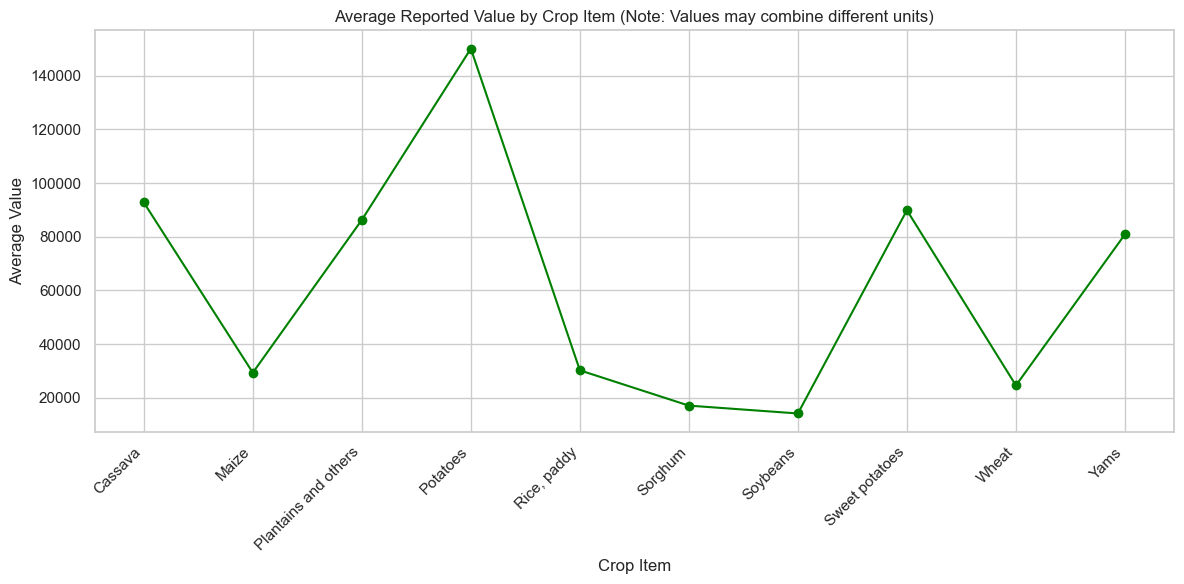

In [12]:
# Calculate the average reported value for each Item (Crop/Product)
# Note: This average will combine all Element types (Production, Yield, etc.) unless pre-filtered.
avg_value_by_item = df.groupby('Item')['Value'].mean()

plt.figure(figsize=(12, 6))
plt.plot(avg_value_by_item.index, avg_value_by_item.values, marker='o', color='green')
plt.title("Average Reported Value by Crop Item (Note: Values may combine different units)")
plt.xlabel("Crop Item")
plt.ylabel("Average Value")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

### Insights:
1. This plot allows you to immediately identify the crops (Item column) that have the highest average recorded metric in the dataset.

2. It visualizes the magnitude of the difference in average metric scores between various agricultural products.

3. The line format is effective here for showing how the average value changes as you move through the alphabetical list of crop items.

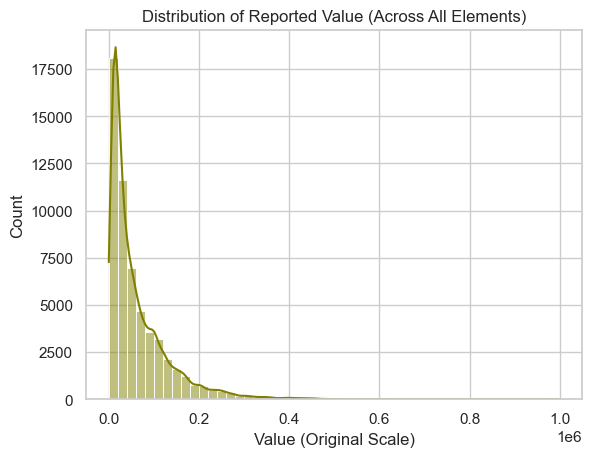

In [ ]:
sns.histplot(df['Value'], bins=50, kde=True, color='olive', log_scale=False)
plt.title("Distribution of Reported Value (Across All Elements)")
plt.xlabel("Value (Original Scale)")
plt.show()

### Insights:
1. The histogram reveals the central tendency, concentration, and skewness of the raw measurement data.

2. If the plot is extremely skewed (a common issue when combining different metrics like Production and Yield), it signals that you should filter the data by the Element column before creating the final distribution plot (e.g., df_yield = df[df['Element'] == 'Yield']).

C:\Users\PanasaKamal\AppData\Local\Temp\ipykernel_32340\2249790944.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Item', y='Value', data=df_top_items, palette='YlGnBu')


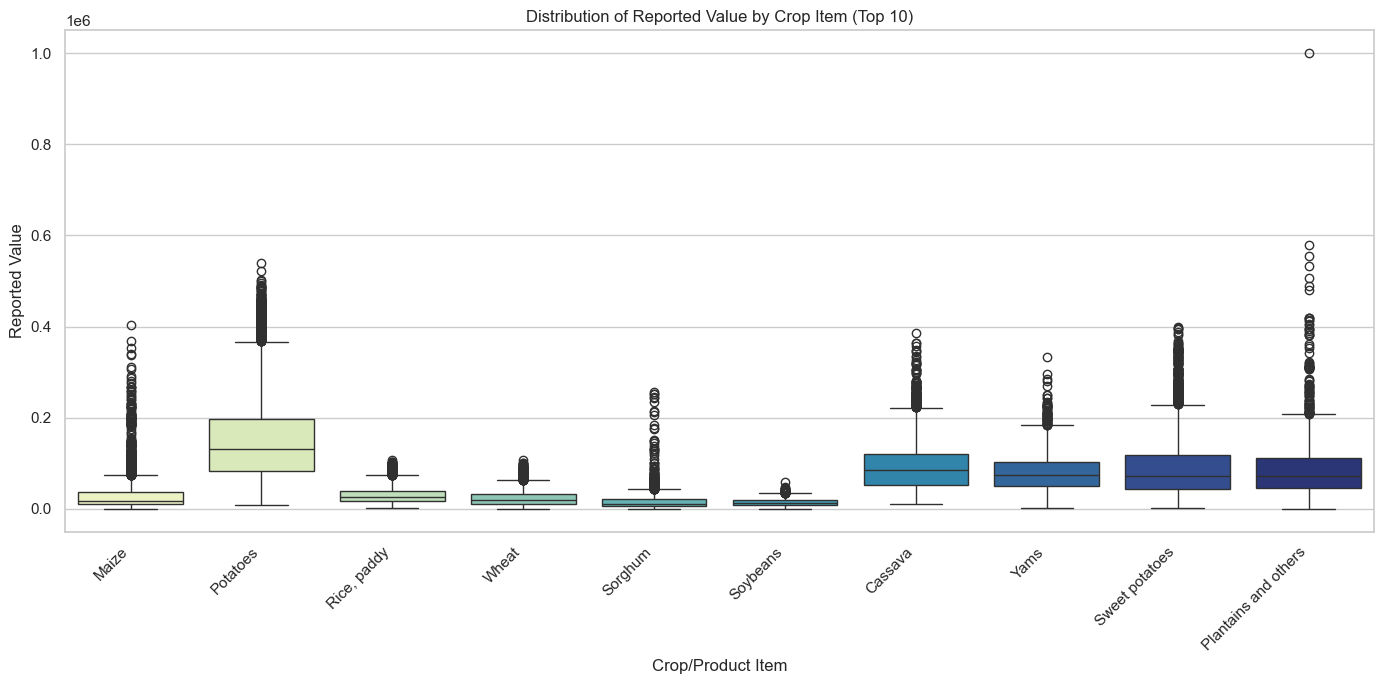

In [ ]:
top_items = df['Item'].value_counts().nlargest(10).index
df_top_items = df[df['Item'].isin(top_items)]

plt.figure(figsize=(14, 7))
sns.boxplot(x='Item', y='Value', data=df_top_items, palette='YlGnBu')
plt.title("Distribution of Reported Value by Crop Item (Top 10)")
plt.xlabel("Crop/Product Item")
plt.ylabel("Reported Value")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Insights:
1. This chart will compare the median, spread (variability), and outliers of the recorded metric (Value) across the top 10 most-reported crops.

2. It helps identify which Item has the most consistent reporting (tight box) and which shows extremely high or low outlier values compared to its normal reporting range.

<Figure size 1200x1200 with 0 Axes>

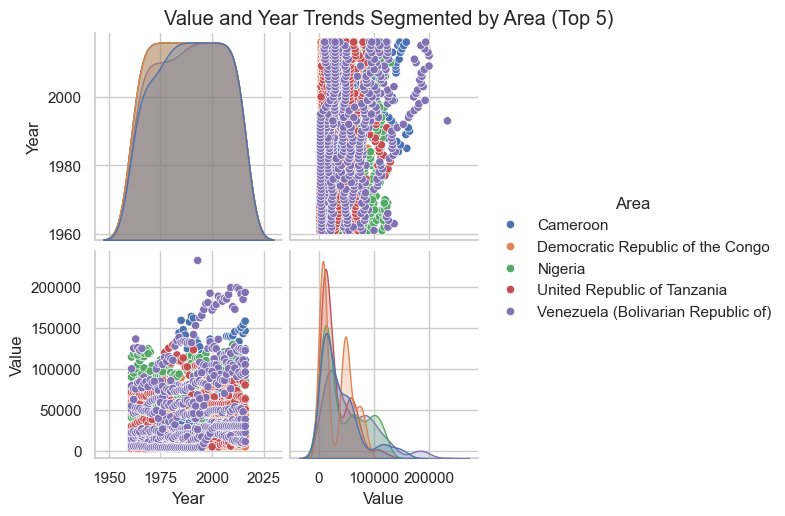

In [17]:
# To keep the plot manageable, we first filter for the top 5 areas with the most data.
top_areas = df['Area'].value_counts().nlargest(5).index
df_top_areas = df[df['Area'].isin(top_areas)]

plt.figure(figsize=(12, 12))
sns.pairplot(
    df_top_areas,
    vars=['Year', 'Value'],
    hue='Area',
    diag_kind='kde'
)
plt.suptitle("Value and Year Trends Segmented by Area (Top 5)", y=1.02)
plt.show()

### Insights:
1. Temporal Distributions (Diagonal Plots): The diagonal plots (histograms/KDEs) will show the overall distribution of Value and Year for the entire top-5 area sample, with the colors indicating the contribution of each specific area.

2. Trend Comparison (Off-Diagonal Plot): The key off-diagonal scatter plot (Value vs. Year) will reveal if different geographical Areas exhibit different growth, decline, or reporting trends over time. For example, one area might have consistently high values over all years, while another might show a strong positive trend.

3. Density of Reporting: The KDE plots along the diagonal will show if reporting (Value) is clustered around specific figures or if data reporting is more focused in certain recent or historical Years for different areas.

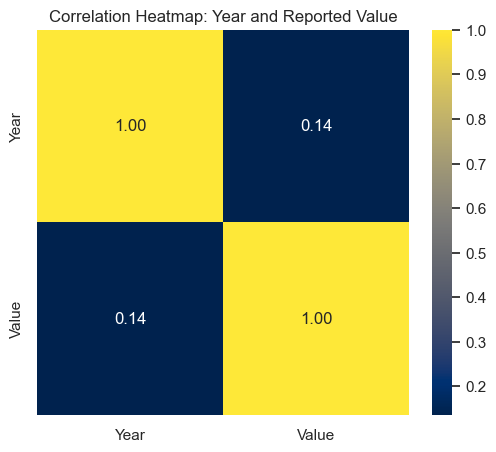

In [18]:
# Calculate correlation matrix for the primary numerical features: Year and Value
corr = df[['Year', 'Value']].corr()

# Create the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='cividis', fmt=".2f")
plt.title("Correlation Heatmap: Year and Reported Value")
plt.show()

### Insights:
1. The resulting heatmap will show a single non-identity correlation coefficient, revealing the linear relationship between Year and Value.

2. The sign and magnitude of the correlation will indicate if the reported metric has a strong or weak long-term trend (positive: consistently increasing over time; negative: consistently decreasing).